The data set consists following Input variables :
1 - fixed acidity  2 - volatile acidity  3 - citric acid  4 - residual sugar  5 - chlorides  6 - free sulfur dioxide

7 - total sulfur dioxide  8 - density  9 - pH   10 - sulphates   11 - alcohol

and the Output variable gives the quality of th wine based on the input variables: 

12 - quality (score between 0 and 10)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score, roc_curve 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [4]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from pandas_profiling import ProfileReport
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [5]:
df = pd.read_csv('winequality_red.csv')

In [6]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [7]:
set(df.quality) # No fo classes in data set

{3, 4, 5, 6, 7, 8}

In [8]:
# Performing EDA on data set

In [9]:
pf = ProfileReport(df)

In [10]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


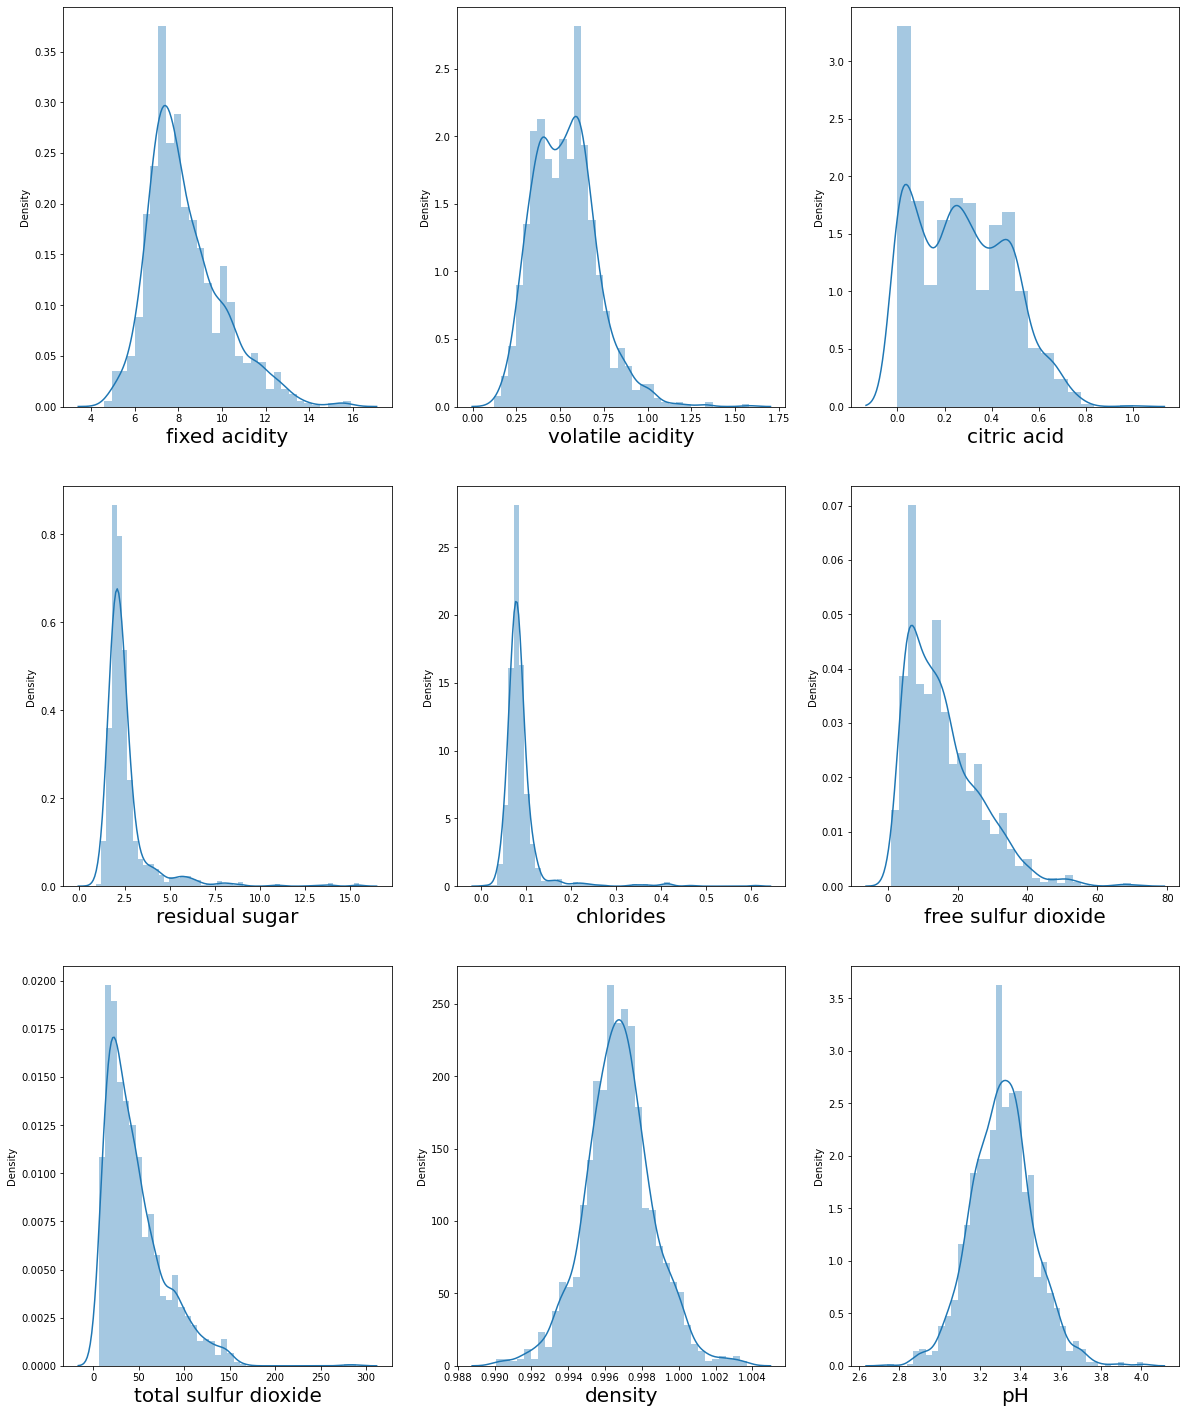

In [12]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [13]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
x = df.drop(columns='quality')

In [15]:
y = df.quality

In [16]:
# Splitting data in test and train

In [17]:
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size = .25,random_state = 30)

In [18]:
dt_model = DecisionTreeClassifier()

In [19]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
feature_name=list(x.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

[Text(612.7025891723116, 1057.0, 'alcohol <= 10.35\ngini = 0.642\nsamples = 1199\nvalue = [8, 35, 512, 477, 153, 14]\nclass = 5'),
 Text(360.477124788315, 996.6, 'total sulfur dioxide <= 95.5\ngini = 0.528\nsamples = 666\nvalue = [6, 20, 406, 209, 23, 2]\nclass = 5'),
 Text(228.62910139712108, 936.2, 'sulphates <= 0.585\ngini = 0.554\nsamples = 584\nvalue = [6, 19, 332, 202, 23, 2]\nclass = 5'),
 Text(89.6827900084674, 875.8, 'total sulfur dioxide <= 90.5\ngini = 0.468\nsamples = 261\nvalue = [3, 14, 179, 63, 2, 0]\nclass = 5'),
 Text(63.253386960203215, 815.4000000000001, 'alcohol <= 9.075\ngini = 0.453\nsamples = 250\nvalue = [3, 14, 176, 55, 2, 0]\nclass = 5'),
 Text(21.734123624047417, 755.0, 'total sulfur dioxide <= 39.0\ngini = 0.604\nsamples = 15\nvalue = [0, 2, 6, 7, 0, 0]\nclass = 6'),
 Text(14.174428450465706, 694.6, 'fixed acidity <= 7.1\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]\nclass = 6'),
 Text(10.394580863674852, 634.2, 'fixed acidity <= 6.95\ngini = 0.5\ns

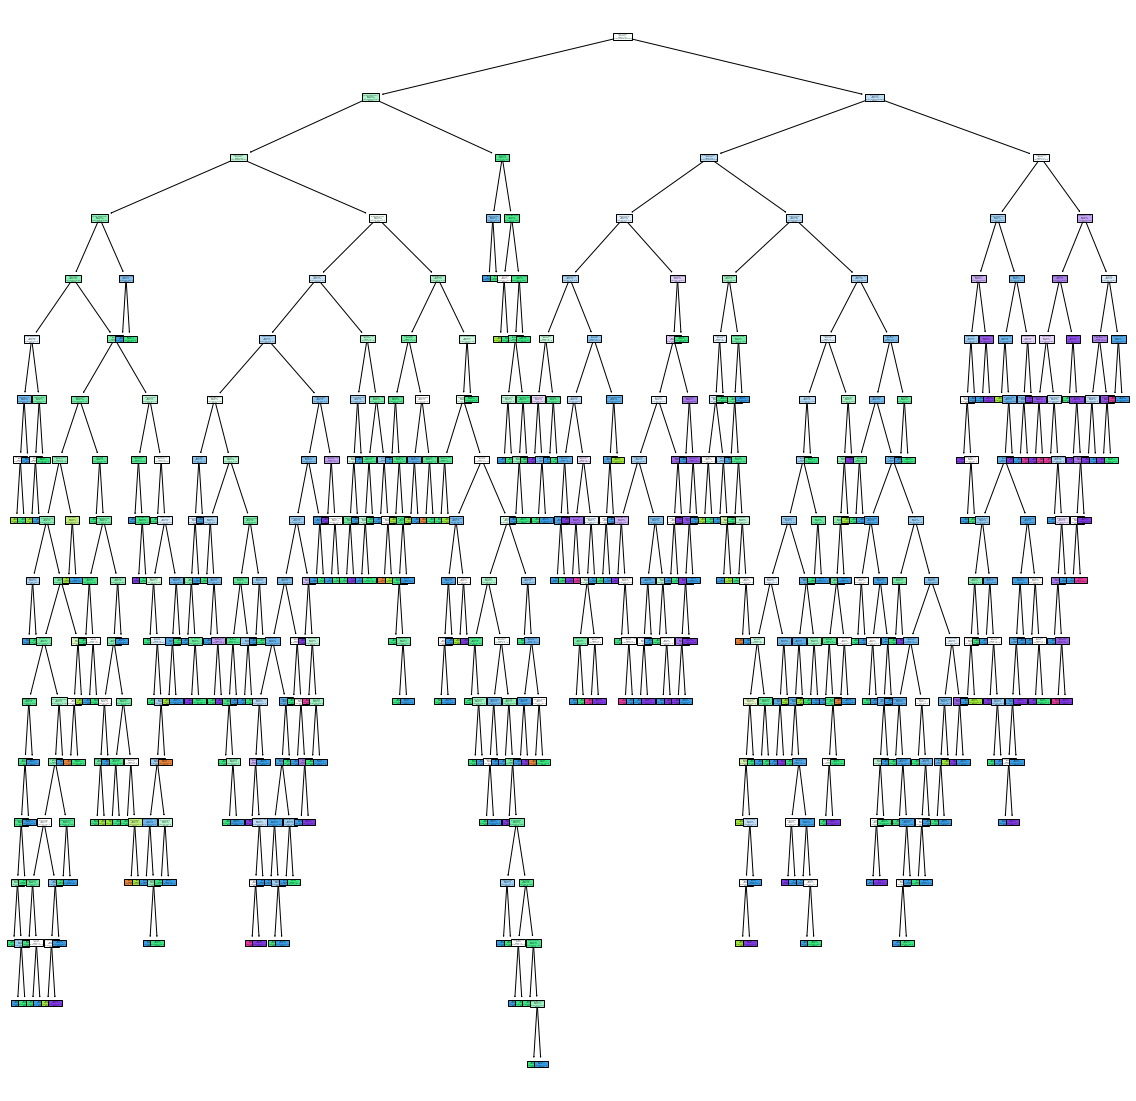

In [21]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled= True,class_names=[str(i) for i in set(y_train)] ,feature_names=x_train.columns)

In [22]:
dt_model.score(x_train,y_train)

1.0

In [23]:
dt_model.score(x_test,y_test)

0.63

In [24]:
path =dt_model.cost_complexity_pruning_path(x_train,y_train) # Performing tree pruning 

In [25]:
ccp_alpha = path["ccp_alphas"]

In [26]:
dt_m1 =[]
score =[]
for c in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=c)
    dt_m.fit(x_train,y_train)
    dt_m1.append(dt_m)
    

In [27]:
Train_score =[i.score(x_train,y_train) for i in dt_m1]
Test_score = [i.score(x_test,y_test) for i in dt_m1] 

In [28]:
# Finding best values of alpha

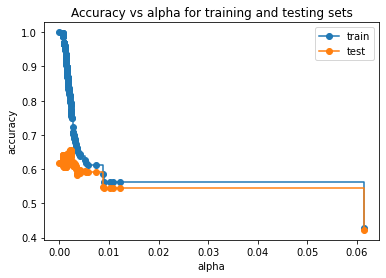

In [29]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, Train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, Test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [30]:
dt_mo_ccp =DecisionTreeClassifier(random_state=0,ccp_alpha=0.001)

In [31]:
dt_mo_ccp.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=0)

In [32]:
dt_mo_ccp.score(x_train,y_train)

0.9683069224353628

In [33]:
dt_mo_ccp.score(x_test,y_test)

0.625

[Text(185.74793701171876, 211.04470588235293, 'X[10] <= 10.35\ngini = 0.642\nsamples = 1199\nvalue = [8, 35, 512, 477, 153, 14]'),
 Text(111.6656982421875, 198.25411764705882, 'X[6] <= 95.5\ngini = 0.528\nsamples = 666\nvalue = [6, 20, 406, 209, 23, 2]'),
 Text(70.78139648437501, 185.4635294117647, 'X[9] <= 0.585\ngini = 0.554\nsamples = 584\nvalue = [6, 19, 332, 202, 23, 2]'),
 Text(25.768652343750002, 172.6729411764706, 'X[6] <= 90.5\ngini = 0.468\nsamples = 261\nvalue = [3, 14, 179, 63, 2, 0]'),
 Text(18.6837890625, 159.88235294117646, 'X[10] <= 9.075\ngini = 0.453\nsamples = 250\nvalue = [3, 14, 176, 55, 2, 0]'),
 Text(8.5640625, 147.09176470588235, 'X[6] <= 39.0\ngini = 0.604\nsamples = 15\nvalue = [0, 2, 6, 7, 0, 0]'),
 Text(5.8640625, 134.30117647058825, 'X[8] <= 3.38\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(4.5140625000000005, 121.51058823529411, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6, 0, 0]'),
 Text(7.214062500000001, 121.51058823529411, 'gini = 0

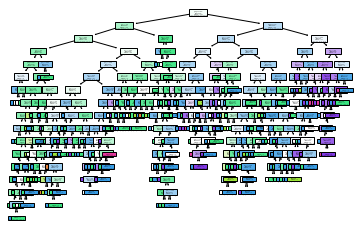

In [34]:
plt.figure()
tree.plot_tree(dt_mo_ccp,filled=True)

In [35]:
dt_ne = DecisionTreeClassifier()

In [36]:
# performing gridsearch for DT

In [66]:
grid_pram = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(2,40,1),
             "min_samples_split":range(2,10 ,1),
             "min_samples_leaf":range(1,10,1),
             'ccp_alpha':np.random.rand(20)}

In [38]:
grid_ccp = GridSearchCV(estimator=dt_mo_ccp, param_grid=grid_pram, cv=5)

In [39]:
grid_ccp.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.001, random_state=0),
             param_grid={'ccp_alpha': array([0.48538096, 0.72557736, 0.17698874, 0.87973703, 0.93477979,
       0.0274514 , 0.58827238, 0.96996423, 0.18743616, 0.32138098,
       0.81822885, 0.28935337, 0.82577075, 0.38825928, 0.27545463,
       0.26547022, 0.00325376, 0.72161771, 0.91747236, 0.07106112]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [40]:
grid_ccp.best_params_ # Finding the best parameters

{'ccp_alpha': 0.003253760650233306,
 'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [41]:
dt_n = DecisionTreeClassifier(ccp_alpha=0.05, criterion="gini", max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter="best")

In [42]:
dt_n.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.05, max_depth=2)

In [43]:
dt_n.score(x_train,y_train)

0.5621351125938282

In [44]:
dt_n.score(x_test,y_test)

0.545

In [45]:
# Decline of train score after hyperparameter tunning -Model was overfitted 

In [46]:
# performing bagging classifier

In [47]:
bag_dt = BaggingClassifier(DecisionTreeClassifier() , n_estimators=100)

In [48]:
bag_dt.fit(x_train  , y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [49]:
# performing KNN classifier

In [50]:
bag_knn = BaggingClassifier(KNeighborsClassifier(6) , n_estimators=10)

In [51]:
bag_knn.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [52]:
# performing randomforest classifier

In [53]:
rf = RandomForestClassifier(n_estimators=5)

In [54]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5)

In [55]:
rf.score(x_test,y_test)

0.6225

In [56]:
bag_knn.score(x_test,y_test)

0.5075

In [57]:
bag_dt.score(x_test, y_test)

0.7125

In [58]:
# Bagging claasifier (decison tree) perform better than bagging clssifier(knn) and random forest on test data set

In [59]:
# performing Xg classifier

In [71]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [72]:
param_grid={
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]   
}

In [73]:
model = XGBClassifier(objective='binary:logistic')

In [74]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [75]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.1s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=

[CV 4/5] END  learning_rate=0.5, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=5, n_estimators=100;, sc

[CV 2/5] END  learning_rate=0.1, max_depth=20, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=20, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=20, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=20, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=20, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=20, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=20, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=20, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=20, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=20, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=20, n_estim

[CV 1/5] END  learning_rate=0.001, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=5, n_

XGBoostError: [23:20:01] /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:553: Invalid parameter " learning_rate" contains whitespace.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000013559c364 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x00000001356563c3 xgboost::LearnerConfiguration::ValidateParameters() + 2435
  [bt] (2) 3   libxgboost.dylib                    0x000000013564a108 xgboost::LearnerConfiguration::Configure() + 1608
  [bt] (3) 4   libxgboost.dylib                    0x000000013564a407 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 119
  [bt] (4) 5   libxgboost.dylib                    0x00000001355a08f7 XGBoosterUpdateOneIter + 151
  [bt] (5) 6   libffi.7.dylib                      0x000000010ba4fead ffi_call_unix64 + 85
  [bt] (6) 7   ???                                 0x0000000306653ed0 0x0 + 12992200400



In [76]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 10}

In [77]:
new_model=XGBClassifier(learning_rate= 1, max_depth= 3, n_estimators= 10)
new_model.fit(x_train,y_train)

[23:20:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [79]:
new_model.score(x_test, y_test)

0.635

In [80]:
# Recommanded Bagging claasifier (decison tree) as it perform better on test data